In [1]:
import nnfs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from nnfs.datasets import spiral_data


In [3]:
#coding the neurons , activation fns and optimzers and loss functions
class DenseLayer():
    def __init__(self,n_features,n_neurons):
        self.weights=0.01*np.ones((n_features,n_neurons))
        self.biases=np.zeros((1,n_neurons))
    def forward(self,input):
        return np.dot(input,self.weights)+self.biases

class RelU_Activation():
    def forward(self,input):
        return np.maximum(0,input)
    
class Softmax_Activation():
    def forward(self,input):
        exponential=np.exp(input-np.max(input,axis=1,keepdims=True))
        return exponential/np.sum(exponential,axis=1,keepdims=True)

class Loss_Func():
    def loss(self,y_pred,y_true):
        y_pred_clipped=np.clip(y_pred,1e-7,1-1e-7)
        if len(y_true.shape)==1:
            confidences=(y_pred_clipped[range(len(y_pred)),y_true])
        else:
            confidences=np.sum(y_pred_clipped*y_true,axis=1)
        logs=-np.log(confidences)
        return np.mean(logs)

In [4]:
X,y=spiral_data(samples=1000,classes=3)
X

array([[-0.00000000e+00,  0.00000000e+00],
       [ 1.03523145e-04,  9.95633448e-04],
       [-5.80295815e-04,  1.91605553e-03],
       ...,
       [-9.95351365e-01, -7.26337612e-02],
       [-9.47461774e-01,  3.16725730e-01],
       [-6.83081072e-01,  7.30342556e-01]], shape=(3000, 2))

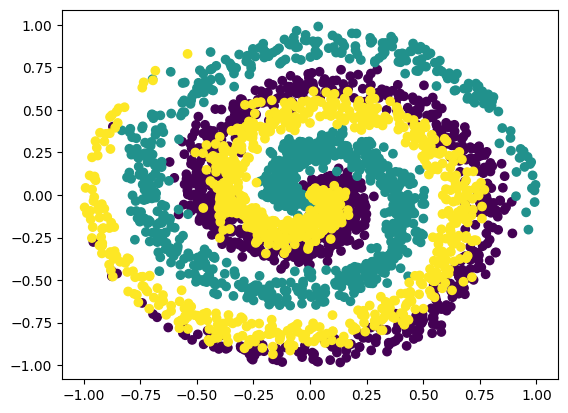

In [5]:
plt.scatter (X[:,0],X[:,1],c=y)

In [6]:
# print(X.shape[1])
layer1=DenseLayer(X.shape[1],3)
relu=RelU_Activation()
layer2=DenseLayer(3,3)
softmax=Softmax_Activation()
out=layer1.forward(X)
out=relu.forward(out)
out=layer2.forward(out)
out=softmax.forward(out)

/var/folders/jh/0djpqpqx0zdgc726txgst9z40000gn/T/ipykernel_3065/2768618460.py:7: RuntimeWarning: divide by zero encountered in dot
  return np.dot(input,self.weights)+self.biases
/var/folders/jh/0djpqpqx0zdgc726txgst9z40000gn/T/ipykernel_3065/2768618460.py:7: RuntimeWarning: overflow encountered in dot
  return np.dot(input,self.weights)+self.biases
/var/folders/jh/0djpqpqx0zdgc726txgst9z40000gn/T/ipykernel_3065/2768618460.py:7: RuntimeWarning: invalid value encountered in dot
  return np.dot(input,self.weights)+self.biases


In [7]:
out

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       ...,
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]], shape=(3000, 3))

In [8]:
y

array([0, 0, 0, ..., 2, 2, 2], shape=(3000,), dtype=uint8)

In [9]:
loss_fn=Loss_Func()
loss=loss_fn.loss(out,y)

In [10]:
loss

np.float64(1.0986122886681096)

In [11]:
#accuracies
def acc(y_pred):
 y_pred1=np.argmax(y_pred,axis=1)
 accuracies=np.sum(y_pred1==y)
 return accuracies/len(y_pred)

In [12]:
accuracy1=acc(out)
accuracy1

np.float64(0.3333333333333333)

In [13]:
# y_pred1

In [14]:
#optimization

epochs=1000000
min_loss=9999999
best_layer1_weights=layer1.weights.copy()
best_layer1_biases=layer1.biases.copy()
best_layer2_weights=layer2.weights.copy()
best_layer2_biases=layer2.biases.copy()
for i in range(epochs):
    layer1.weights+=0.05* np.random.randn(2,3)
    layer1.biases+=0.05*np.random.randn(1,3)
    layer2.weights+=0.05* np.random.randn(3,3)
    layer2.biases+=0.05*np.random.randn(1,3)

    out=layer1.forward(X)
    out=relu.forward(out)
    out=layer2.forward(out)
    out=softmax.forward(out)

    loss=loss_fn.loss(out,y)
    accuracy=acc(out)
    if loss<min_loss:
        best_layer1_weights=layer1.weights.copy()
        best_layer1_biases=layer1.biases.copy()
        best_layer2_weights=layer2.weights.copy()
        best_layer2_biases=layer2.biases.copy()
        min_loss=loss
        print(f'Better weights found   Loss : {loss}   Acc : {accuracy}'  )
    else:  
          
          layer1.weights=best_layer1_weights.copy()
          layer1.biases=best_layer1_biases.copy()
          layer2.weights=best_layer2_weights.copy()
          layer2.biases=best_layer2_biases.copy()

/var/folders/jh/0djpqpqx0zdgc726txgst9z40000gn/T/ipykernel_3065/2768618460.py:7: RuntimeWarning: divide by zero encountered in dot
  return np.dot(input,self.weights)+self.biases
/var/folders/jh/0djpqpqx0zdgc726txgst9z40000gn/T/ipykernel_3065/2768618460.py:7: RuntimeWarning: overflow encountered in dot
  return np.dot(input,self.weights)+self.biases
/var/folders/jh/0djpqpqx0zdgc726txgst9z40000gn/T/ipykernel_3065/2768618460.py:7: RuntimeWarning: invalid value encountered in dot
  return np.dot(input,self.weights)+self.biases


Better weights found   Loss : 1.1001284907226931   Acc : 0.3333333333333333
Better weights found   Loss : 1.1000201095691564   Acc : 0.3333333333333333
Better weights found   Loss : 1.0981977969921064   Acc : 0.39166666666666666
Better weights found   Loss : 1.098032817428801   Acc : 0.3333333333333333
Better weights found   Loss : 1.0973890714838963   Acc : 0.3333333333333333
Better weights found   Loss : 1.0973551850002132   Acc : 0.3333333333333333
Better weights found   Loss : 1.097053856464031   Acc : 0.379
Better weights found   Loss : 1.0957592723354395   Acc : 0.3333333333333333
Better weights found   Loss : 1.0952317605508446   Acc : 0.371
Better weights found   Loss : 1.0943563480948808   Acc : 0.3546666666666667
Better weights found   Loss : 1.0940984334618535   Acc : 0.382
Better weights found   Loss : 1.0940932877391425   Acc : 0.3636666666666667
Better weights found   Loss : 1.0938013179227442   Acc : 0.3333333333333333
Better weights found   Loss : 1.0936371609710391   A

KeyboardInterrupt: 